<h1><center>Set up</center></h1>

In [1]:
# relevant imports
from typing import Dict, List

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# improving visual quality of graphs
plt.rc("axes", titlesize=18)
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rc("legend", fontsize=13)
plt.rc("font", size=13)
plt.rc("lines", linewidth=2)

In [4]:
df = pd.read_csv("masterspreadsheet_all.csv")
df.head()

,Unnamed: 0,ModelType,agents,decay_limit,discount_rate,epsilon,epsilon_decay,hidden_size,learning_rate,lookback,...,num_layers,tn_mean_score,tn_mean_time,tn_rank,tr_cooperation_percentage,tr_cumul_regret,tr_cumul_reward,tr_defection_percentage,tr_final_loss,tr_mean_reward
0,0,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,609.140323,18.849598,25.0,0.412525,57390.0,62610.0,0.587475,1.116258,1.565250
1,1,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,646.303226,21.482931,25.0,0.878275,11181.0,108819.0,0.121725,2.247977,2.720475
2,2,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,539.161290,18.026233,25.0,0.407200,66691.0,53309.0,0.592800,0.438530,1.332725
3,3,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,546.259677,31.196609,25.0,0.453475,55424.0,64576.0,0.546525,1.167565,1.614400
4,4,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,534.727419,18.156603,25.0,0.568300,52790.0,67210.0,0.431700,1.256334,1.680250


In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
# auxiliary function to plot histograms visually appealinng
def plot_histograms(x: pd.DataFrame, bins: int, xlabel: str, ylabel: str, title: str) -> None:
    plt.figure(figsize=(15,8))
    ax = plt.gca()
    x.hist(ax=ax, bins=bins, density=True, color="xkcd:azure")
    x.plot.kde(ax=ax, color="xkcd:tangerine")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.xlim([x.min(), x.max()])

In [26]:
# auxiliary function to make line graphs visually appealing
def plot_linegraph(x: Dict, xlabel: str, ylabel: str, title: str) -> None:
    plt.figure(figsize=(15,8))
    df_x = pd.DataFrame(data=x)
    plt.plot(df_x[xlabel], df_x[ylabel])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [23]:
def plot_barchart(x: Dict, xlabel: str, ylabel: str, title: str) -> None:
    plt.figure(figsize=(15, 10))
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.bar(x[xlabel], x[ylabel], color="xkcd:azure")
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

<h1><center>Analysis of results</center></h1>

<h2>Did Q-Network agents fare better than tabular learners?</h2>

In [10]:
df[pd.isnull(df["ModelType"])]

,ModelType,agents,decay_limit,discount_rate,epsilon,epsilon_decay,hidden_size,learning_rate,lookback,n1,...,num_layers,tn_mean_score,tn_mean_time,tn_rank,tr_cooperation_percentage,tr_cumul_regret,tr_cumul_reward,tr_defection_percentage,tr_final_loss,tr_mean_reward
2336,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.001,1.0,NaN,...,NaN,399.333871,2.821025,31.0,0.642600,77419.0,522581.0,0.357400,NaN,2.612905
2337,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.001,1.0,NaN,...,NaN,439.635484,2.673221,31.0,0.166975,313231.0,286769.0,0.833025,NaN,1.433845
2338,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.010,1.0,NaN,...,NaN,676.045161,0.803082,25.0,0.882550,26401.0,573599.0,0.117450,NaN,2.867995
2339,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.010,1.0,NaN,...,NaN,688.153226,0.733928,25.0,0.870780,33946.0,566054.0,0.129220,NaN,2.830270
2340,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.001,2.0,NaN,...,NaN,666.256452,0.737969,25.0,0.643330,119702.0,480298.0,0.356670,NaN,2.401490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,NaN,Borufsen,0.05,0.99,0.10,0.0,NaN,0.100,10.0,NaN,...,NaN,722.812581,4.406982,24.0,0.908120,221732.0,5778268.0,0.091880,NaN,2.889134
4331,NaN,Borufsen,0.05,0.95,0.20,0.0,NaN,0.010,10.0,NaN,...,NaN,715.381613,4.206030,25.0,0.627424,1496352.0,4503648.0,0.372576,NaN,2.251824
4332,NaN,Borufsen,0.05,0.99,0.20,0.0,NaN,0.010,10.0,NaN,...,NaN,434.066129,30.187939,30.0,0.602185,1732151.0,4267849.0,0.397815,NaN,2.133925
4333,NaN,Borufsen,0.05,0.95,0.20,0.0,NaN,0.100,10.0,NaN,...,NaN,709.700968,4.100973,25.0,0.730523,1134159.0,4865841.0,0.269477,NaN,2.432920


In [17]:
df_dqn = df[df["ModelType"] == "DQN"]
df_rnn = df[df["ModelType"] == "RNN"]
df_gru = df[df["ModelType"] == "GRU"]
df_tabular = df[pd.isnull(df["ModelType"])]

In [18]:
print(f"The number of DQN agents is {len(df_dqn)}")
print(f"The number of RNN agents is {len(df_rnn)}")
print(f"The number of GRU agents is {len(df_gru)}")
print(f"The number of tabular agents is {len(df_tabular)}")

The number of DQN agents is 1894
The number of RNN agents is 439
The number of GRU agents is 3
The number of tabular agents is 1999


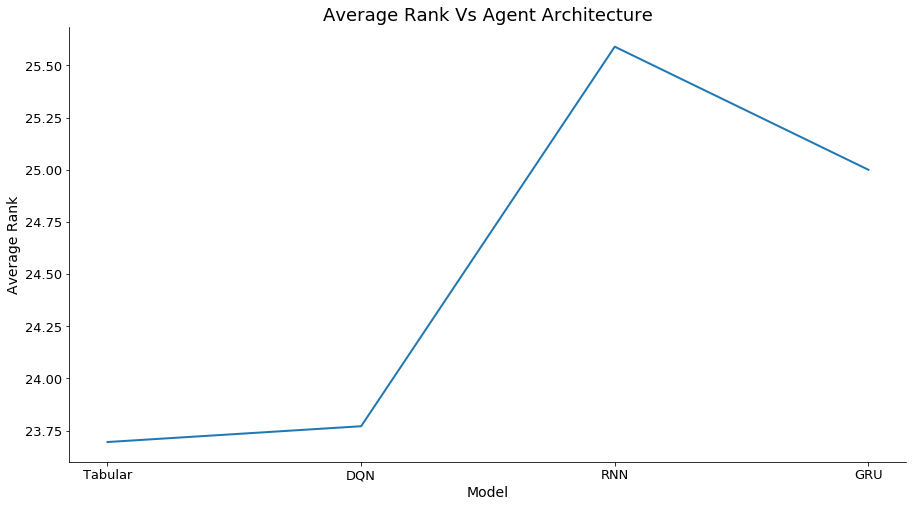

In [68]:
avg_rank_networks = {
    "Model" : ["Tabular", "DQN", "RNN", "GRU"],
    "Average Rank" : [
        df_tabular["tn_rank"].sum() / len(df_tabular),
        df_dqn["tn_rank"].sum() / len(df_dqn),
        df_rnn["tn_rank"].sum() / len(df_rnn),
        df_gru["tn_rank"].sum() / len(df_gru),
    ]
}

plot_linegraph(avg_rank_networks, "Model", "Average Rank", "Average Rank Vs Agent Architecture")

<h3>It looks as though tabular Q-learners perform the best, followed by DQN. Out of the four models, RNN performs the most poorly. Due to stochastic nature of our project, the results for GRU may not be reliable, and so would require further investigation to verify that it is indeed worse than DQN and tabular.
    

Henceforth, I will exclude GRU from analysis.</h3>

<h2><center>How does each hyperparameter affect model performance?</center></h2>

<h3><center>1. Epsilon</center></h3>

In [28]:
df["epsilon"].value_counts()

0.20    1516
0.10    1499
0.05     729
0.01     361
0.30     216
0.15      12
0.25       1
Name: epsilon, dtype: int64

In [29]:
# wont use 0.25 since there is only 1 run. Not incredibly reliable.
df_epsil_01 = df[df["epsilon"] == 0.01]
df_epsil_05 = df[df["epsilon"] == 0.05]
df_epsil_10 = df[df["epsilon"] == 0.1]
df_epsil_15 = df[df["epsilon"] == 0.15]
df_epsil_20 = df[df["epsilon"] == 0.2]
df_epsil_30 = df[df["epsilon"] == 0.30]

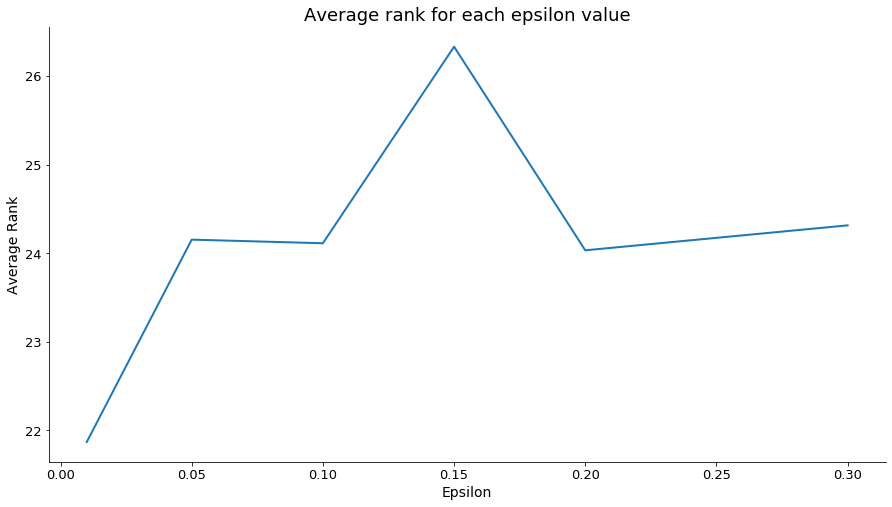

In [30]:
avg_epsil_all = {
    "Epsilon" : [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    "Average Rank" : [
        df_epsil_01["tn_rank"].sum() / len(df_epsil_01),
        df_epsil_05["tn_rank"].sum() / len(df_epsil_05),
        df_epsil_10["tn_rank"].sum() / len(df_epsil_10),
        df_epsil_15["tn_rank"].sum() / len(df_epsil_15),
        df_epsil_20["tn_rank"].sum() / len(df_epsil_20),
        df_epsil_30["tn_rank"].sum() / len(df_epsil_30),
    ]
}

plot_linegraph(avg_epsil_all, "Epsilon", "Average Rank", "Average rank Vs Epsilon")

<h4>Epsilon value of 0.01 performs the best; this is surprising. Lets investigate it further.</h4>

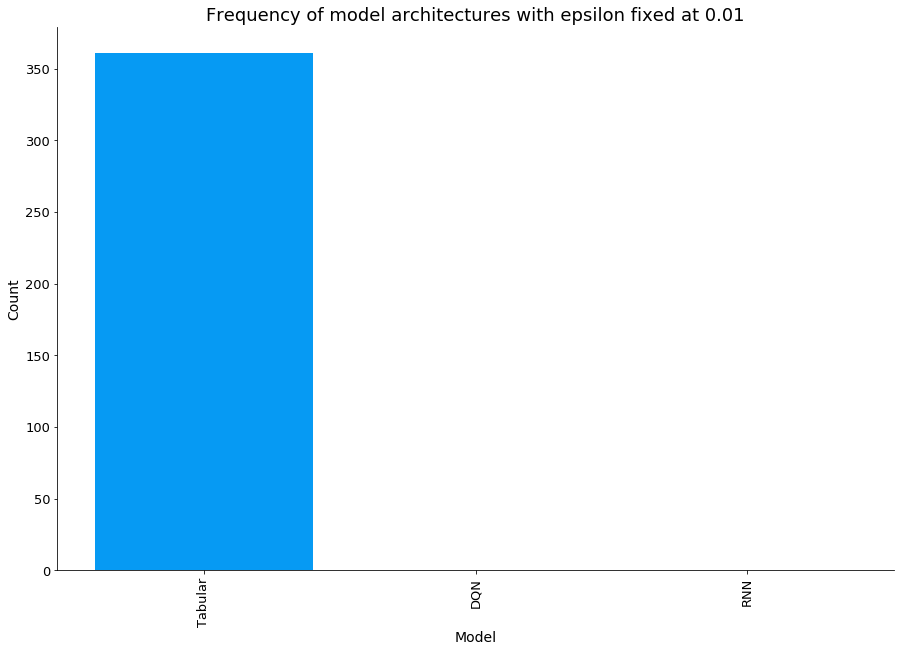

In [69]:
epsil_01_dist = {
    "Model" : ["Tabular", "DQN", "RNN"],
    "Count" : [
        len(df_epsil_01[pd.isnull(df_epsil_01["ModelType"])]),
        len(df_epsil_01[df_epsil_01["ModelType"] == "DQN"]),
        len(df_epsil_01[df_epsil_01["ModelType"] == "RNN"])
    ]
}

plot_barchart(epsil_01_dist, "Model", "Count", "Frequency of model architectures with epsilon fixed at 0.01")

<h4>This explains our result from earlier. Tabular learners had the lowest average rank out of all models. Therefore, as all of the models that ran a grid search with epsilon = 0.01 are tabular, the average rank for the epsilon value of 0.01 is lower.</h4>

<h4>To confirm this hypothesis, I will now investigate the effect of epsilon on both DQN and tabular learners.</h4>

In [37]:
df_tabular["epsilon"].value_counts()

0.10    730
0.20    613
0.01    361
0.30    216
0.05     78
Name: epsilon, dtype: int64

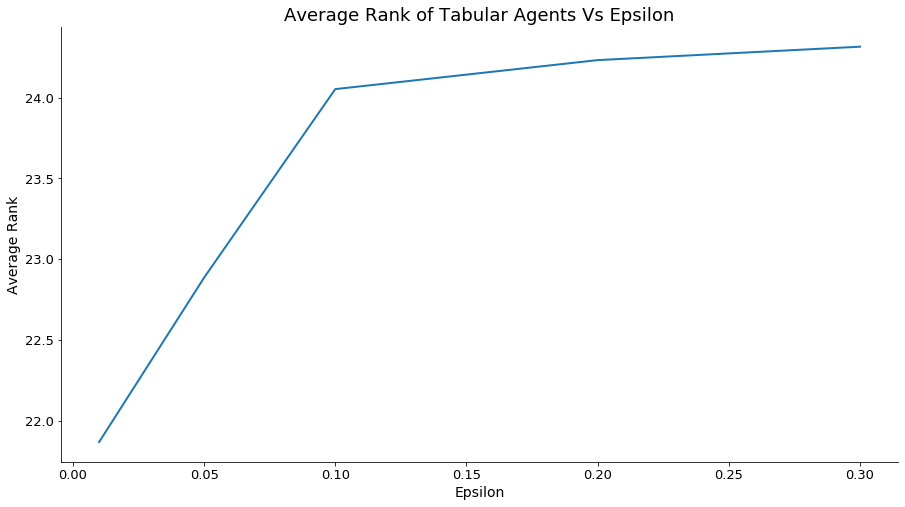

In [70]:
df_tab_epsil_01 = df_tabular[df_tabular["epsilon"] == 0.01]
df_tab_epsil_05 = df_tabular[df_tabular["epsilon"] == 0.05]
df_tab_epsil_10 = df_tabular[df_tabular["epsilon"] == 0.1]
df_tab_epsil_20 = df_tabular[df_tabular["epsilon"] == 0.2]
df_tab_epsil_30 = df_tabular[df_tabular["epsilon"] == 0.3]

avg_epsil_tab = {
    "Epsilon" : [0.01, 0.05, 0.1, 0.2, 0.3],
    "Average Rank" : [
        df_tab_epsil_01["tn_rank"].sum() / len(df_tab_epsil_01),
        df_tab_epsil_05["tn_rank"].sum() / len(df_tab_epsil_05),
        df_tab_epsil_10["tn_rank"].sum() / len(df_tab_epsil_10),
        df_tab_epsil_20["tn_rank"].sum() / len(df_tab_epsil_20),
        df_tab_epsil_30["tn_rank"].sum() / len(df_tab_epsil_30),
    ]
}

plot_linegraph(avg_epsil_tab, "Epsilon", "Average Rank", "Average Rank of Tabular Agents Vs Epsilon")

In [42]:
df_dqn["epsilon"].value_counts()

0.20    760
0.10    614
0.05    507
0.15     12
0.25      1
Name: epsilon, dtype: int64

<h4>We wont use epsilon values of 0.15 and 0.25 since the number of runs is quite low.</h4>

C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


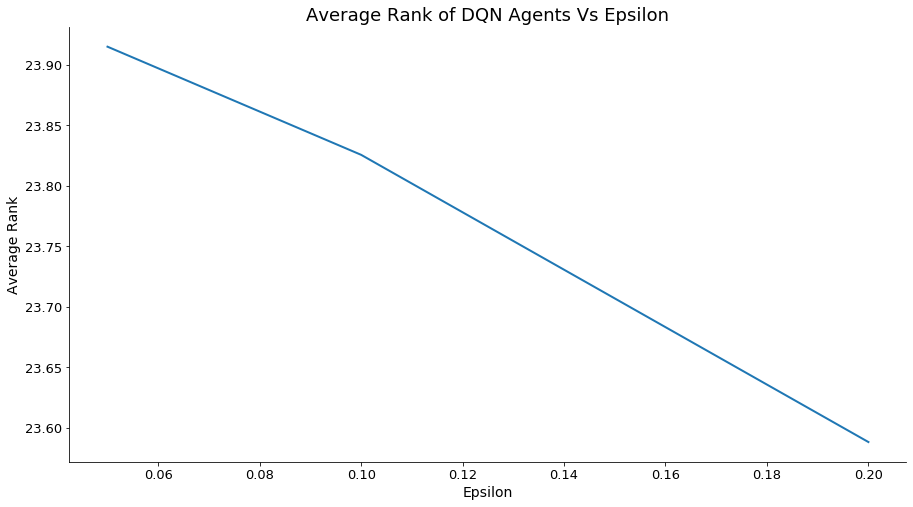

In [71]:
df_dqn_epsil_05 = df_dqn[df_dqn["epsilon"] == 0.05]
df_dqn_epsil_10 = df_dqn[df_dqn["epsilon"] == 0.1]
df_dqn_epsil_20 = df_dqn[df_dqn["epsilon"] == 0.2]
df_dqn_epsil_30 = df_dqn[df_dqn["epsilon"] == 0.3]

avg_epsil_dqn = {
    "Epsilon" : [0.05, 0.1, 0.2, 0.3],
    "Average Rank" : [
        df_dqn_epsil_05["tn_rank"].sum() / len(df_dqn_epsil_05),
        df_dqn_epsil_10["tn_rank"].sum() / len(df_dqn_epsil_10),
        df_dqn_epsil_20["tn_rank"].sum() / len(df_dqn_epsil_20),
        df_dqn_epsil_30["tn_rank"].sum() / len(df_dqn_epsil_30),
    ]
}

plot_linegraph(avg_epsil_dqn, "Epsilon", "Average Rank", "Average Rank of DQN Agents Vs Epsilon")

<h4>The resulting graph for DQN agents is as expected, more exploration would lead to the agent learning better strategies. On the other hand, the graph for tabular learners is unexpected; it seems as though the Q-Learning agent learns the optimal strategy from the start.</h4>

<h3><center>2. Look back</center></h3>

In [46]:
df["lookback"].value_counts()

1.0     1084
2.0      794
8.0      788
4.0      756
10.0     573
6.0      321
5.0       18
Name: lookback, dtype: int64

<h4>We will ignore the lookback of 5 due to the low number of results.</h4>

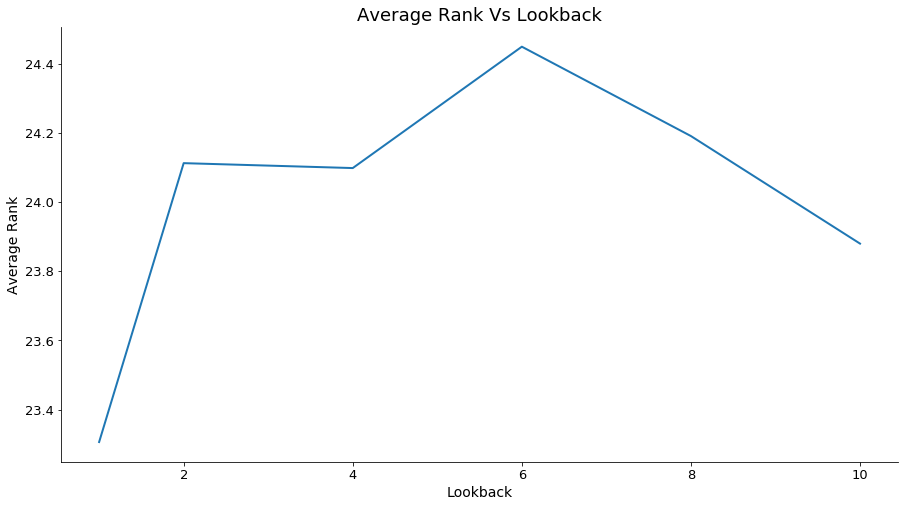

In [72]:
df_lb_1 = df[df["lookback"] == 1]
df_lb_2 = df[df["lookback"] == 2]
df_lb_4 = df[df["lookback"] == 4]
df_lb_6 = df[df["lookback"] == 6]
df_lb_8 = df[df["lookback"] == 8]
df_lb_10 = df[df["lookback"] == 10]

avg_ranks_lb_all = {
    "Lookback" : [1, 2, 4, 6, 8, 10],
    "Average Rank" : [
        df_lb_1["tn_rank"].sum() / len(df_lb_1),
        df_lb_2["tn_rank"].sum() / len(df_lb_2),
        df_lb_4["tn_rank"].sum() / len(df_lb_4),
        df_lb_6["tn_rank"].sum() / len(df_lb_6),
        df_lb_8["tn_rank"].sum() / len(df_lb_8),
        df_lb_10["tn_rank"].sum() / len(df_lb_10),
    ]
}
plot_linegraph(avg_ranks_lb_all, "Lookback", "Average Rank", "Average Rank Vs Lookback")

<h4>Yet another surprising result. My hypothesis was that the longer the lookback the better the performance of the agent because it would be able to learn more complicated strategies. However, in a game as simple as iterated prisoners dilemma, a lower lookback proves more fruitful.</h4>

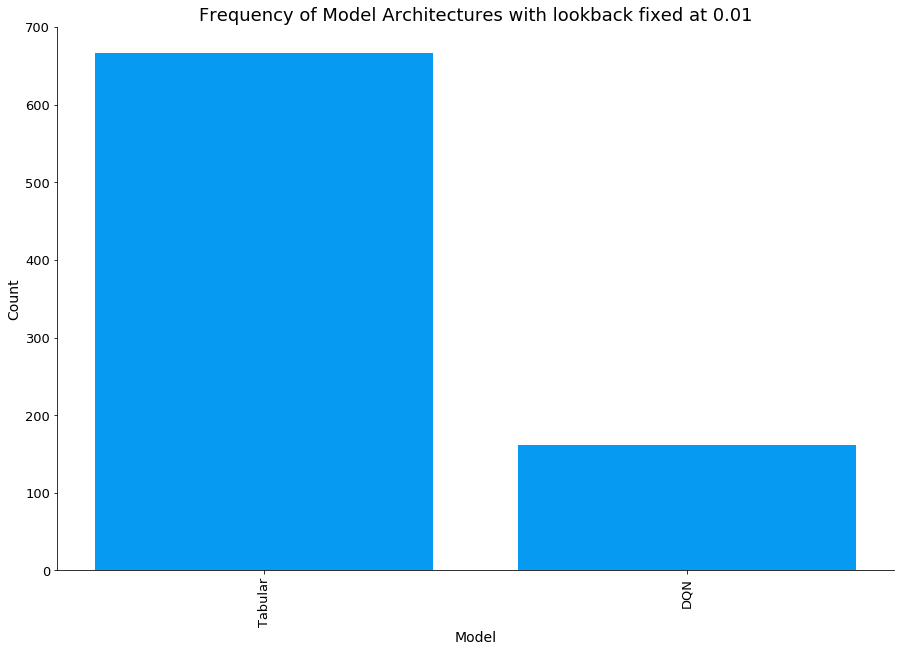

In [73]:
lb_1_dist = {
    "Model" : ["Tabular", "DQN"],
    "Count" : [
        len(df_lb_1[pd.isnull(df_lb_1["ModelType"])]),
        len(df_lb_1[df_lb_1["ModelType"] == "DQN"])
    ]
}

plot_barchart(lb_1_dist, "Model", "Count", "Frequency of Model Architectures with lookback fixed at 0.01")

<h4>Same reasoning applies here as epsilon.</h4>

In [53]:
df_tabular["lookback"].value_counts()

1.0     667
2.0     342
10.0    290
8.0     284
4.0     277
6.0     120
5.0      18
Name: lookback, dtype: int64

<h4>Discard 5 due to low number of runs.</h4>

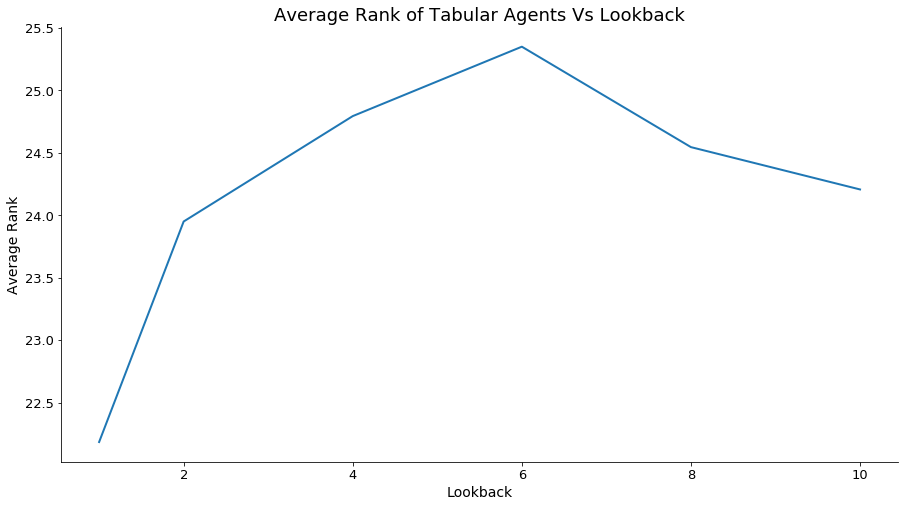

In [74]:
avg_lb_tab = {
    "Lookback" : [1, 2, 4, 6, 8, 10],
    "Average Rank" : [
        df_tabular[df_tabular["lookback"] == 1]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 1]),
        df_tabular[df_tabular["lookback"] == 2]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 2]),
        df_tabular[df_tabular["lookback"] == 4]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 4]),
        df_tabular[df_tabular["lookback"] == 6]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 6]),
        df_tabular[df_tabular["lookback"] == 8]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 8]),
        df_tabular[df_tabular["lookback"] == 10]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 10]),
    ]
}

plot_linegraph(avg_lb_tab, "Lookback", "Average Rank", "Average Rank of Tabular Agents Vs Lookback")

<h4>Tabular learners perform best with a lookback of 1.</h4>

In [55]:
df_dqn["lookback"].value_counts()

8.0     501
4.0     473
10.0    283
2.0     277
6.0     198
1.0     162
Name: lookback, dtype: int64

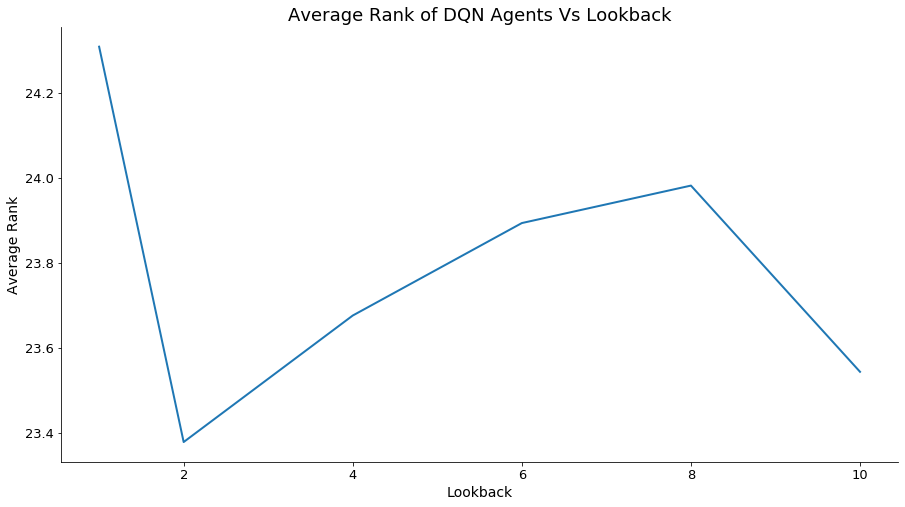

In [75]:
avg_lb_dqn = {
    "Lookback" : [1, 2, 4, 6, 8, 10],
    "Average Rank" : [
        df_dqn[df_dqn["lookback"] == 1]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 1]),
        df_dqn[df_dqn["lookback"] == 2]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 2]),
        df_dqn[df_dqn["lookback"] == 4]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 4]),
        df_dqn[df_dqn["lookback"] == 6]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 6]),
        df_dqn[df_dqn["lookback"] == 8]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 8]),
        df_dqn[df_dqn["lookback"] == 10]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 10]),
    ]
}

plot_linegraph(avg_lb_dqn, "Lookback", "Average Rank", "Average Rank of DQN Agents Vs Lookback")

<h4>DQN agents perform worst with a lookback of 1. Increasing the lookback from 1 -> 2 has the greatest performance boost. Thus, for DQN agents, a lookback of 2 will suffice.</h4>

<h3><center>3. Discount Rate</center></h3>

In [58]:
df["discount_rate"].value_counts()

0.95    2345
0.99    1773
0.90     216
Name: discount_rate, dtype: int64

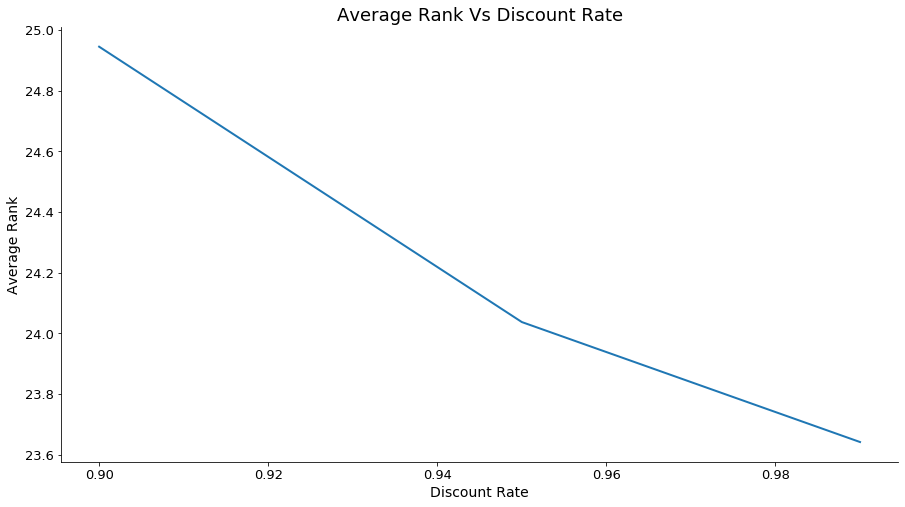

In [76]:
avg_dr_all = {
    "Discount Rate" : [0.9, 0.95, 0.99],
    "Average Rank" : [
        df[df["discount_rate"] == 0.9]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.9]),
        df[df["discount_rate"] == 0.95]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.95]),
        df[df["discount_rate"] == 0.99]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.99]),
    ]
}

plot_linegraph(avg_dr_all, "Discount Rate", "Average Rank", "Average Rank Vs Discount Rate")

<h4>This is what we expected to observe. One interpretation of the discount rate is how much each agent values future rewards. As agents start to consider the future more, their ranking starts to improve.</h4>

In [60]:
df_tabular["discount_rate"].value_counts()

0.99    1116
0.95     666
0.90     216
Name: discount_rate, dtype: int64

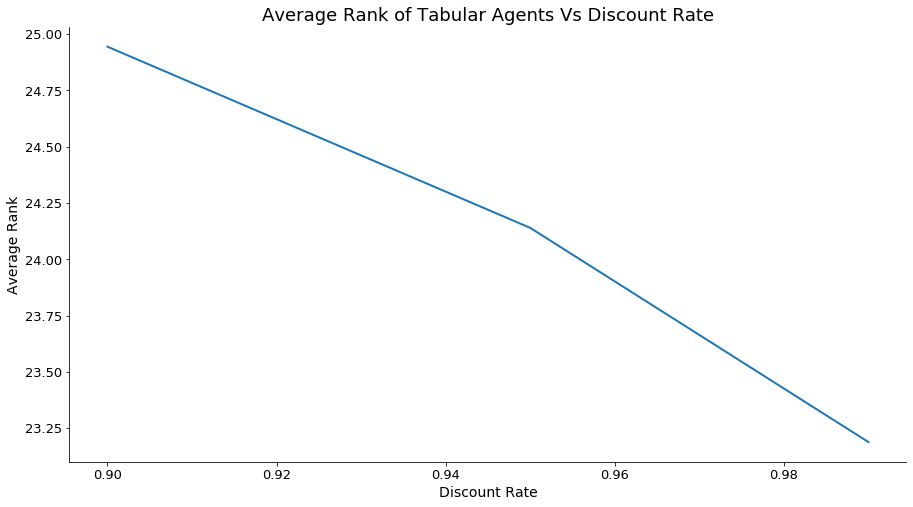

In [77]:
avg_dr_tab = {
    "Discount Rate" : [0.9, 0.95, 0.99],
    "Average Rank" : [
        df_tabular[df_tabular["discount_rate"] == 0.9]["tn_rank"].sum() / len(df_tabular[df_tabular["discount_rate"] == 0.9]),
        df_tabular[df_tabular["discount_rate"] == 0.95]["tn_rank"].sum() / len(df_tabular[df_tabular["discount_rate"] == 0.95]),
        df_tabular[df_tabular["discount_rate"] == 0.99]["tn_rank"].sum() / len(df_tabular[df_tabular["discount_rate"] == 0.99]),
    ]
}

plot_linegraph(avg_dr_tab, "Discount Rate", "Average Rank", "Average Rank of Tabular Agents Vs Discount Rate")

C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


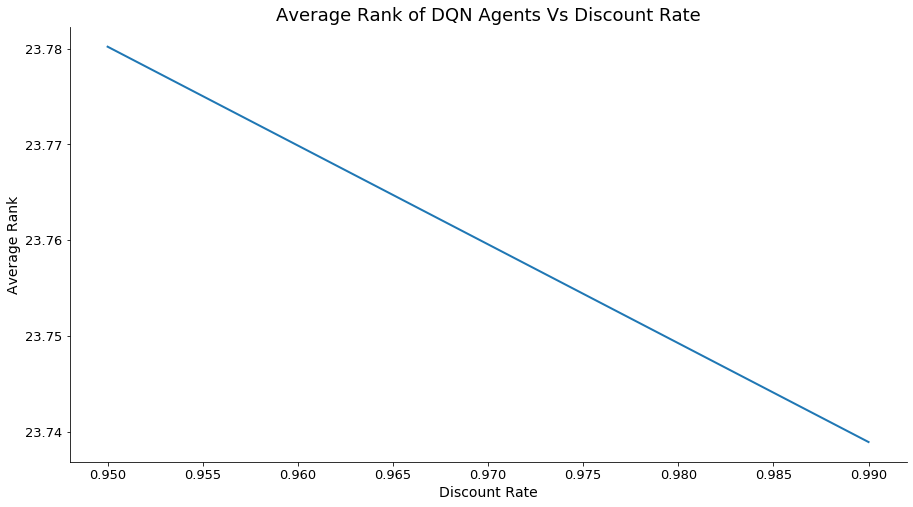

In [78]:
avg_dr_dqn = {
    "Discount Rate" : [0.9, 0.95, 0.99],
    "Average Rank" : [
        df_dqn[df_dqn["discount_rate"] == 0.9]["tn_rank"].sum() / len(df_dqn[df_dqn["discount_rate"] == 0.9]),
        df_dqn[df_dqn["discount_rate"] == 0.95]["tn_rank"].sum() / len(df_dqn[df_dqn["discount_rate"] == 0.95]),
        df_dqn[df_dqn["discount_rate"] == 0.99]["tn_rank"].sum() / len(df_dqn[df_dqn["discount_rate"] == 0.99]),
    ]
}

plot_linegraph(avg_dr_dqn, "Discount Rate", "Average Rank", "Average Rank of DQN Agents Vs Discount Rate")

<h4>For both DQN and tabular, the discount value of 0.99 is best.</h4>

<h3><center>4. Learning Rate</center></h3>

In [63]:
df["learning_rate"].value_counts()

0.010    1939
0.001    1510
0.100     851
0.005      24
0.200      10
Name: learning_rate, dtype: int64

<h4>Ignore learning rate of 0.2 due to the low number of runs.</h4>

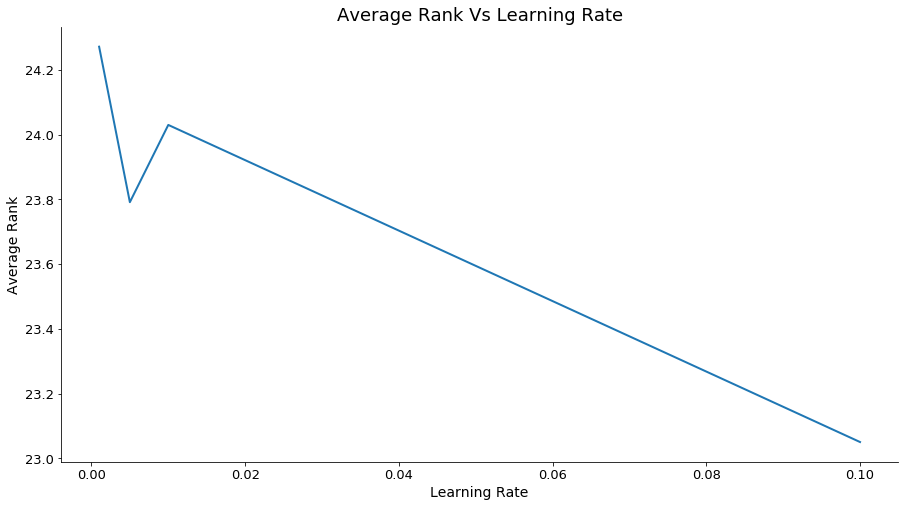

In [79]:
avg_lr_all = {
    "Learning Rate" : [0.001, 0.005, 0.01, 0.1],
    "Average Rank" : [
        df[df["learning_rate"] == 0.001]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.001]),
        df[df["learning_rate"] == 0.005]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.005]),
        df[df["learning_rate"] == 0.01]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.01]),
        df[df["learning_rate"] == 0.1]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.1]),
    ]
}

plot_linegraph(avg_lr_all, "Learning Rate", "Average Rank", "Average Rank Vs Learning Rate")

In [66]:
df_tabular["learning_rate"].value_counts()

0.100    851
0.010    781
0.001    356
0.200     10
Name: learning_rate, dtype: int64

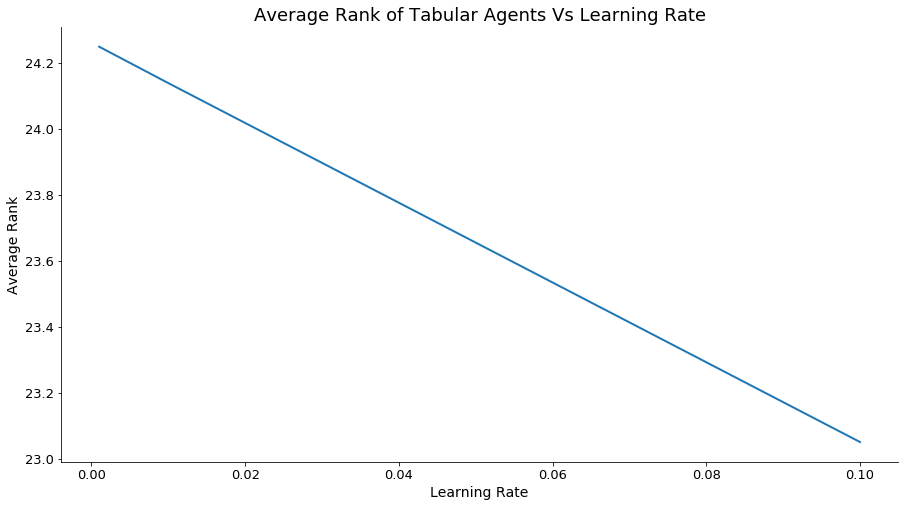

In [80]:
avg_lr_tab = {
    "Learning Rate" : [0.001, 0.01, 0.1],
    "Average Rank" : [
        df_tabular[df_tabular["learning_rate"] == 0.001]["tn_rank"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.001]),
        df_tabular[df_tabular["learning_rate"] == 0.01]["tn_rank"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.01]),
        df_tabular[df_tabular["learning_rate"] == 0.1]["tn_rank"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.1]),        
    ]
}

plot_linegraph(avg_lr_tab, "Learning Rate", "Average Rank", "Average Rank of Tabular Agents Vs Learning Rate")

In [85]:
df_dqn["learning_rate"].value_counts()

0.001    940
0.010    930
0.005     24
Name: learning_rate, dtype: int64

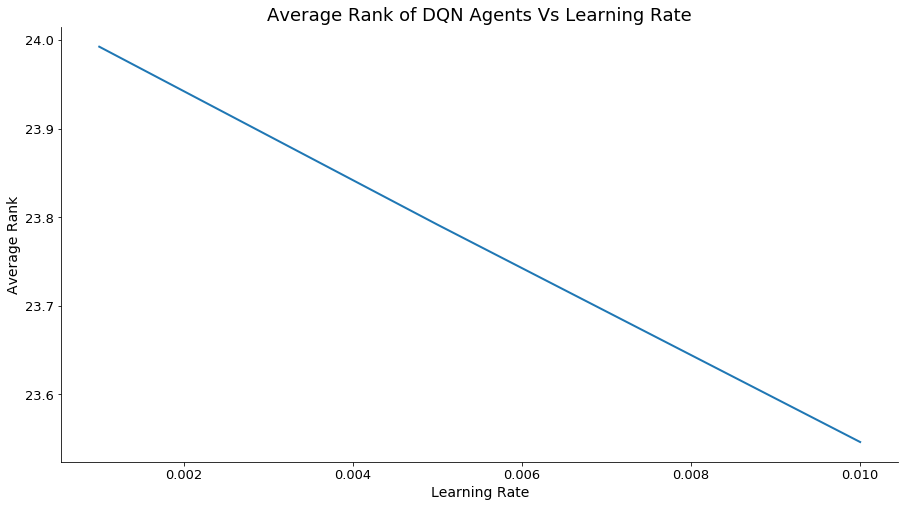

In [86]:
avg_lr_dqn = {
    "Learning Rate" : [0.001, 0.005, 0.01],
    "Average Rank" : [
        df_dqn[df_dqn["learning_rate"] == 0.001]["tn_rank"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.001]),
        df_dqn[df_dqn["learning_rate"] == 0.005]["tn_rank"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.005]),
        df_dqn[df_dqn["learning_rate"] == 0.01]["tn_rank"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.01]),        
    ]
}

plot_linegraph(avg_lr_dqn, "Learning Rate", "Average Rank", "Average Rank of DQN Agents Vs Learning Rate")

<h4>It looks as though the higher the learning rate, the better the performance of both DQN and tabular agents.</h4>

In [87]:
# curious to see avg rank of lr for 0.2
df_tabular[df_tabular["learning_rate"] == 0.2]["tn_rank"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.2])

24.1

<h4>The average rank increases for learning rate of 0.2. We can tentatively conclude that agent performance deteriorates as learning rate is increased past the threshold value of 0.1. In order to verify this hypothesis, more runs would need to be completed with learning rate at 0.2.</h4>